# Purpose of this project is to check the relationship of chances of fradulent job posting based on multiple independent variables 

In [28]:
#importing all the relevent libraries in the beginning

import numpy as np
import pandas as pd
import seaborn as sns
import statsmodels.api as sm
import matplotlib.pyplot as plt
%matplotlib inline

import sklearn.metrics as metrics
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn import neighbors
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.preprocessing import PolynomialFeatures
from sklearn import datasets
from sklearn.preprocessing import StandardScaler



In [4]:
df = pd.read_csv(r'E:\Univerity Documents\Semester 2\Machine Learning\ML Project\fakejobposting.csv',encoding='latin-1')

In [5]:
df

,job_id,title,location,department,salary_range,company_profile,description,requirements,benefits,telecommuting,has_company_logo,has_questions,employment_type,required_experience,required_education,industry,function,fraudulent
0,1,Marketing Intern,"US, NY, New York",Marketing,NaN,"We're Food52, and we've created a groundbreaki...","Food52, a fast-growing, James Beard Award-winn...",Experience with content management systems a m...,NaN,0,1,0,Other,Internship,NaN,NaN,Marketing,0
1,2,Customer Service - Cloud Video Production,"NZ, , Auckland",Success,NaN,"90 Seconds, the worlds Cloud Video Production ...",Organised - Focused - Vibrant - Awesome!Do you...,What we expect from you:Your key responsibilit...,What you will get from usThrough being part of...,0,1,0,Full-time,Not Applicable,NaN,Marketing and Advertising,Customer Service,0
2,3,Commissioning Machinery Assistant (CMA),"US, IA, Wever",NaN,NaN,Valor Services provides Workforce Solutions th...,"Our client, located in Houston, is actively se...",Implement pre-commissioning and commissioning ...,NaN,0,1,0,NaN,NaN,NaN,NaN,NaN,0
3,4,Account Executive - Washington DC,"US, DC, Washington",Sales,NaN,Our passion for improving quality of life thro...,THE COMPANY: ESRI â Environmental Systems Re...,"EDUCATION:Â Bachelorâs or Masterâs in GIS,...",Our culture is anything but corporateâwe hav...,0,1,0,Full-time,Mid-Senior level,Bachelor's Degree,Computer Software,Sales,0
4,5,Bill Review Manager,"US, FL, Fort Worth",NaN,NaN,SpotSource Solutions LLC is a Global Human Cap...,JOB TITLE: Itemization Review ManagerLOCATION:...,QUALIFICATIONS:RN license in the State of Texa...,Full Benefits Offered,0,1,1,Full-time,Mid-Senior level,Bachelor's Degree,Hospital & Health Care,Health Care Provider,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17875,17876,Account Director - Distribution,"CA, ON, Toronto",Sales,NaN,Vend is looking for some awesome new talent to...,Just in case this is the first time youâve v...,To ace this role you:Will eat comprehensive St...,What can you expect from us?We have an open cu...,0,1,1,Full-time,Mid-Senior level,NaN,Computer Software,Sales,0
17876,17877,Payroll Accountant,"US, PA, Philadelphia",Accounting,NaN,WebLinc is the e-commerce platform and service...,The Payroll Accountant will focus primarily on...,- B.A. or B.S. in Accounting-Â Desire to have ...,Health &amp; WellnessMedical planPrescription ...,0,1,1,Full-time,Mid-Senior level,Bachelor's Degree,Internet,Accounting/Auditing,0
17877,17878,Project Cost Control Staff Engineer - Cost Con...,"US, TX, Houston",NaN,NaN,We Provide Full Time Permanent Positions for m...,Experienced Project Cost Control Staff Enginee...,At least 12 years professional experience.Abil...,NaN,0,0,0,Full-time,NaN,NaN,NaN,NaN,0
17878,17879,Graphic Designer,"NG, LA, Lagos",NaN,NaN,NaN,Nemsia Studios is looking for an experienced v...,1. Must be fluent in the latest versions of Co...,Competitive salary (compensation will be based...,0,0,1,Contract,Not Applicable,Professional,Graphic Design,Design,0


In [6]:
df.describe()

,job_id,telecommuting,has_company_logo,has_questions,fraudulent
count,17880.000000,17880.000000,17880.000000,17880.000000,17880.000000
mean,8940.500000,0.042897,0.795302,0.491723,0.048434
std,5161.655742,0.202631,0.403492,0.499945,0.214688
min,1.000000,0.000000,0.000000,0.000000,0.000000
25%,4470.750000,0.000000,1.000000,0.000000,0.000000
50%,8940.500000,0.000000,1.000000,0.000000,0.000000
75%,13410.250000,0.000000,1.000000,1.000000,0.000000
max,17880.000000,1.000000,1.000000,1.000000,1.000000


In [7]:
df.sample(10)

,job_id,title,location,department,salary_range,company_profile,description,requirements,benefits,telecommuting,has_company_logo,has_questions,employment_type,required_experience,required_education,industry,function,fraudulent
14093,14094,"Account Growth Manager, Religious Organizations","US, CA, Palo Alto",NaN,NaN,NaN,We are a small team working to engineer the pe...,2-5 years sales experienceÂ Previous experienc...,NaN,0,1,1,Full-time,NaN,Bachelor's Degree,Financial Services,Sales,0
7145,7146,Accounts Assistant,"GB, LND, Putney",NaN,25000-30000,Magpie is a boutique recruitment agency specia...,A great opportunity has arisen in an antipodea...,(Both Practical and Theoretical) knowledge of ...,"Â£25,000 - Â£30,000 PA plus study surport.Â",1,1,0,Full-time,Associate,High School or equivalent,Accounting,Accounting/Auditing,0
11359,11360,Sales Representative with Management Training ...,"US, TX, Arlington",AFSDT,45000-67000,"Argenta Field Solutions values the client, cre...",Interviewing now for full-time positions in Ar...,- Sales experience preferred- Ability to work ...,- AFLAC- Health Insurance (Management)Â - Trai...,0,1,0,Full-time,NaN,NaN,Consumer Services,Sales,0
14751,14752,Church Communications Content Writer - Freelance,"US, IN, Fishers",Marketing,NaN,Bluebridge was created by a team of people who...,Bluebridge is a software as a service companyÂ...,Proven writing skills with a healthy list of p...,NaN,1,1,1,Contract,NaN,NaN,Writing and Editing,Writing/Editing,0
2413,2414,RECEPTIONIST,"US, SC, BLUFFTON",Department,NaN,Stokes Automotive Group-Beaufort is a family o...,FullÂ and Part timeÂ Receptionist needed for o...,Applicant mustÂ be able to answer a multi-line...,"401K , Dental and Medical Ins. offered.Â",0,1,0,Full-time,Entry level,High School or equivalent,Automotive,NaN,0
17065,17066,Internship: Multispectral Image Coding,"US, , Cambridge",MM,NaN,MERL's internship program gives students excel...,MERL is looking for an intern to work on multi...,The ideal candidate would be a Ph.D. student w...,"Experience: At MERL, you will work closely wit...",0,1,1,Temporary,Internship,NaN,NaN,Research,0
11702,11703,Business Analyst - Product,"BR, SP, SÃ£o Paulo",NaN,NaN,"Nubank is an early stage, technology-driven fi...",Why are credit card products important for us?...,This kind of experience/background is relevant...,"Competitive compensation packageHealth, dental...",0,1,1,Full-time,NaN,NaN,Financial Services,NaN,0
12572,12573,Electrical Maintenance Technician - Major States,"US, MN, Minneapolis",NaN,NaN,We Provide Full Time Permanent Positions for m...,Electrical Maintenance Technician - Versa - St...,NaN,NaN,0,0,0,Full-time,NaN,NaN,Facilities Services,NaN,0
6364,6365,Event Specialists,"US, AR, Fayetteville",NaN,NaN,We are a digital marketing agency with an emph...,We are seeking entry level and experienced sal...,Backgrounds in these areas work well in this p...,Full Time WorkExperience is not necessary as w...,0,1,1,Full-time,Entry level,High School or equivalent,Marketing and Advertising,Sales,0
17782,17783,PART TIMERS Required For Cash Pay Jobs.,"AU, NSW, Sydney",NaN,NaN,NaN,PART TIMERS Required For Cash Pay Jobs.You can...,No any experience required.,NaN,0,0,0,Part-time,NaN,NaN,NaN,NaN,1


In [8]:
df.shape

(17880, 18)

In [9]:
df1 = df.drop_duplicates()

In [10]:
df.dropna()

,job_id,title,location,department,salary_range,company_profile,description,requirements,benefits,telecommuting,has_company_logo,has_questions,employment_type,required_experience,required_education,industry,function,fraudulent
6,7,Head of Content (m/f),"DE, BE, Berlin",ANDROIDPIT,20000-28000,"Founded in 2009, theÂ Fonpit AGÂ rose with its...",Your Responsibilities:Â Manage the English-spe...,Your Know-How:Â Â Â Â Â Â Â Â Â Â Â Â Â Â Â Â ...,Your Benefits:Â Being part of a fast-growing c...,0,1,1,Full-time,Mid-Senior level,Master's Degree,Online Media,Management,0
15,16,VP of Sales - Vault Dragon,"SG, 01, Singapore",Sales,120000-150000,Jungle Ventures is the leading Singapore based...,About Vault DragonÂ Vault Dragon is Dropbox fo...,Key Superpowers3-5 years of high-pressure sale...,"Basic: SGD 120,000Equity negotiable for a rock...",0,1,1,Full-time,Executive,Bachelor's Degree,Facilities Services,Sales,0
23,24,"Vice President, Sales and Sponsorship (Busines...","US, CA, Carlsbad",Businessfriend.com,100000-120000,"WDM Group is an innovative, forward thinking d...",#URL_eda2500ddcedb60957fcd7f5b164e092966f8c4e8...,"Job Requirements:A reputation as a ""go-getter""...",Businessfriend will offer a competitive six fi...,0,1,0,Full-time,Executive,Unspecified,Internet,Sales,0
98,99,IC&E Technician,"US, , Stocton, CA",Oil & Energy,95000-115000,Â Â Â Â Â Â Â Â Â Â Â Â Â Â Â Â...,"IC&amp;E Technician | Bakersfield, CA Mt. Poso...","QualificationsKnowledge, Skills &amp; Abilitie...",BENEFITSWhat is offered:Competitive compensati...,0,1,1,Full-time,Mid-Senior level,High School or equivalent,Oil & Energy,Other,1
102,103,Marketing Administrator,"GB, WAR, Coventry",Marketplace,15000-18000,Renewable Energy and Environmental Protection ...,The job is to support the growth of the #URL_9...,"Computer literateAble to work with HTML, altho...",For a suitably motivated and success orientate...,1,1,0,Full-time,Entry level,Bachelor's Degree,Internet,Marketing,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17734,17735,Customer Service Representative,"US, TX, Houston",Customer Service,30000-50000,Gary Cartwright established Cartwright Propert...,We are Seeking a candidate whose core values i...,Home Computer with Internet AccessBasic Comput...,"Weekly pay, PTO, Paid Holidays, 401 k",1,1,0,Full-time,Entry level,High School or equivalent,Real Estate,Customer Service,1
17759,17760,Customer Service Representative,"US, NY, New York",Customer Service,30000-50000,Gary Cartwright established Cartwright Propert...,We are Seeking a candidate whose core values i...,Home Computer with Internet AccessBasic Comput...,"Weekly pay, PTO, Paid Holidays, 401 k",1,1,0,Full-time,Entry level,High School or equivalent,Real Estate,Customer Service,1
17813,17814,Customer Service Representative,"US, PA, Philadelphia",Customer Service,30000-50000,Gary Cartwright established Cartwright Propert...,We are Seeking a candidate whose core values i...,Home Computer with Internet AccessBasic Comput...,"Weekly pay, PTO, Paid Holidays, 401 k",1,1,0,Full-time,Entry level,High School or equivalent,Real Estate,Customer Service,1
17849,17850,Communication Designer,"US, CA, San Francisco",Design,80000-100000,Balanced Labs exists to provide accountants an...,Balanced Labs exists to improve the lives of a...,"Specifically, weâre looking for:5+ years of ...","We offer great salaries, share options, and a ...",0,1,0,Full-time,Mid-Senior level,Bachelor's Degree,Computer Software,Design,0


In [11]:
df['employment_type'].value_counts()

Full-time    11620
Contract      1524
Part-time      797
Temporary      241
Other          227
Name: employment_type, dtype: int64

In [12]:
df1 = df.drop(['job_id','title','location','department','salary_range','company_profile','description','requirements','benefits','employment_type','required_experience','required_education','industry','function'], axis = 1)
#Removing all the unnecessary columns

In [13]:
df1

,telecommuting,has_company_logo,has_questions,fraudulent
0,0,1,0,0
1,0,1,0,0
2,0,1,0,0
3,0,1,0,0
4,0,1,1,0
...,...,...,...,...
17875,0,1,1,0
17876,0,1,1,0
17877,0,0,0,0
17878,0,0,1,0


In [14]:
df1.dropna()

,telecommuting,has_company_logo,has_questions,fraudulent
0,0,1,0,0
1,0,1,0,0
2,0,1,0,0
3,0,1,0,0
4,0,1,1,0
...,...,...,...,...
17875,0,1,1,0
17876,0,1,1,0
17877,0,0,0,0
17878,0,0,1,0


# Splitting the Data

In [15]:
from sklearn.model_selection import train_test_split

In [16]:
iv = df1[['telecommuting','has_company_logo','has_questions']]

In [17]:
iv

,telecommuting,has_company_logo,has_questions
0,0,1,0
1,0,1,0
2,0,1,0
3,0,1,0
4,0,1,1
...,...,...,...
17875,0,1,1
17876,0,1,1
17877,0,0,0
17878,0,0,1


In [18]:
dv = df1.fraudulent

In [19]:
dv

0        0
1        0
2        0
3        0
4        0
        ..
17875    0
17876    0
17877    0
17878    0
17879    0
Name: fraudulent, Length: 17880, dtype: int64

In [20]:
x_train, x_test, y_train, y_test = train_test_split(iv, dv, test_size=0.3, shuffle = True) #going with 30:70 split

In [21]:
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(12516, 3)
(12516,)
(5364, 3)
(5364,)


In [22]:
MAE_list=[]
MSE_list=[]
RMSE_list=[]
R_Squared_list=[]


def model_evaluation(y_test, predictions):
    mae = metrics.mean_absolute_error(y_test, predictions)
    mse = metrics.mean_squared_error(y_test, predictions)
    rmse = np.sqrt(mse) # or mse**(0.5)  
    r2 = metrics.r2_score(y_test,predictions)
    
    MAE_list.append(mae)
    MSE_list.append(mse)
    RMSE_list.append(rmse)
    R_Squared_list.append(r2)
    
    print("Results of sklearn.metrics: \n")
    print("MAE:",mae)
    print("MSE:", mse)
    print("RMSE:", rmse)
    print("R-Squared:", r2)

# Multiple Linear Regression

In [23]:
regression_model = sm.OLS(y_train, x_train)
results = regression_model.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:             fraudulent   R-squared (uncentered):                   0.012
Model:                            OLS   Adj. R-squared (uncentered):              0.011
Method:                 Least Squares   F-statistic:                              48.93
Date:                Sat, 14 May 2022   Prob (F-statistic):                    1.96e-31
Time:                        16:06:28   Log-Likelihood:                          1355.7
No. Observations:               12516   AIC:                                     -2705.
Df Residuals:                   12513   BIC:                                     -2683.
Df Model:                           3                                                  
Covariance Type:            nonrobust                                                  
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
telecommuting        0.0554      0.010      5.789      0.000       0.037       0.074
has_company_logo     0.0047      0.003      1.533      0.125      -0.001       0.011
has_questions        0.0223      0.004      5.752      0.000       0.015       0.030
==============================================================================
Omnibus:                    10404.446   Durbin-Watson:                   1.965
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           167683.868
Skew:                           4.207   Prob(JB):                         0.00
Kurtosis:                      18.834   Cond. No.                         5.17
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [24]:
print(results.rsquared)
print(results.rsquared_adj)
print(results.pvalues)
print(results.params)

0.011596059129974079
0.011359088633481562
telecommuting       7.251963e-09
has_company_logo    1.253359e-01
has_questions       9.030320e-09
dtype: float64
telecommuting       0.055360
has_company_logo    0.004654
has_questions       0.022258
dtype: float64


In [25]:
predictions = results.predict(x_test)

In [26]:
model_evaluation(y_test, predictions)

Results of sklearn.metrics: 

MAE: 0.06616160674427421
MSE: 0.04940922215661861
RMSE: 0.2222818529628962
R-Squared: -0.03726347856483003


# Polynomial Regression

In [29]:
poly_reg = PolynomialFeatures(degree=3)
x_poly=poly_reg.fit_transform(x_train)
poly_reg.fit(x_poly,y_train)
lin_reg = LinearRegression()
lin_reg.fit(x_poly, y_train)

LinearRegression()

In [30]:
predictions = lin_reg.predict(poly_reg.fit_transform(x_test))

In [31]:
model_evaluation(y_test, predictions)

Results of sklearn.metrics: 

MAE: 0.08600855356980286
MSE: 0.04397269154220592
RMSE: 0.20969666554861077
R-Squared: 0.07686733366603027


# Support Vector Regression

In [32]:
%%timeit -n1 -r1

from sklearn.svm import SVR
svr = SVR()
svr.fit(x_train, y_train)
predictions = svr.predict(x_test)

1.45 s ± 0 ns per loop (mean ± std. dev. of 1 run, 1 loop each)


In [33]:
model_evaluation(y_test, predictions)

Results of sklearn.metrics: 

MAE: 0.08600855356980286
MSE: 0.04397269154220592
RMSE: 0.20969666554861077
R-Squared: 0.07686733366603027


# Decision Tree Regression

In [34]:
%%timeit -n1 -r1

from sklearn.tree import DecisionTreeRegressor
dtr = DecisionTreeRegressor()
dtr.fit(x_train, y_train)
predictions = dtr.predict(x_test)

36.2 ms ± 0 ns per loop (mean ± std. dev. of 1 run, 1 loop each)


In [35]:
model_evaluation(y_test, predictions)

Results of sklearn.metrics: 

MAE: 0.08600855356980286
MSE: 0.04397269154220592
RMSE: 0.20969666554861077
R-Squared: 0.07686733366603027


In [36]:
### Random Forest Regression

In [37]:
from sklearn.ensemble import RandomForestRegressor
rfr = RandomForestRegressor()
rfr.fit(x_train, y_train)
predictions = rfr.predict(x_test)

In [38]:
model_evaluation(y_test, predictions)

Results of sklearn.metrics: 

MAE: 0.0859501596433317
MSE: 0.04397208217042701
RMSE: 0.20969521255962667
R-Squared: 0.07688012640114217


In [39]:
### Ridge Regression

In [40]:
rdg = Ridge(alpha = 0.5)
rdg = rdg.fit(x_train, y_train)
predictions = rdg.predict(x_test)

In [41]:
print(rdg.score(x_train, y_train))
print(rdg.coef_)
print(rdg.intercept_)

0.07119924123265542
[ 0.02070409 -0.13607884 -0.01218265]
0.1608603944818556


In [42]:
model_evaluation(y_test, predictions)

Results of sklearn.metrics: 

MAE: 0.08606542153270325
MSE: 0.04437493544700732
RMSE: 0.21065359110873785
R-Squared: 0.06842289973822535


In [43]:
### Lasso Regression

In [44]:
lasso = Lasso(alpha=0.01)
lasso = lasso.fit(x_train, y_train) 
prediction = lasso.predict(x_test)

In [45]:
print(lasso.score(x_train, y_train))
print(lasso.coef_)
print(lasso.intercept_)

0.05658803049058625
[ 0.         -0.07837598 -0.        ]
0.10996889580093329


In [46]:
model_evaluation(y_test, predictions)

Results of sklearn.metrics: 

MAE: 0.08606542153270325
MSE: 0.04437493544700732
RMSE: 0.21065359110873785
R-Squared: 0.06842289973822535


In [47]:
### KNN Regression


In [48]:
knn = neighbors.KNeighborsRegressor(n_neighbors=3)
fit = knn.fit(x_train, y_train)
predictions = fit.predict(x_test)

In [49]:
model_evaluation(y_test, predictions)

Results of sklearn.metrics: 

MAE: 0.06462838677603777
MSE: 0.05248985002899992
RMSE: 0.2291066346245781
R-Squared: -0.10193607699070828


# Model Comparison

In [51]:
models_list = ['Multiple Linear Regression', 'Polynomial Regression', 'Support Vector Regression', 'Decision Tree Regression', 'Random Forest Regression', 'Ridge Regression', 'Lasso Regression', 'KNN Regression' ]
#models_list = ['Multiple Linear Regression', 'Polynomial Regression', 'Decision Tree Regression', 'Random Forest Regression', 'Ridge Regression', 'Lasso Regression', 'KNN Regression' ]

models_list

['Multiple Linear Regression',
 'Polynomial Regression',
 'Support Vector Regression',
 'Decision Tree Regression',
 'Random Forest Regression',
 'Ridge Regression',
 'Lasso Regression',
 'KNN Regression']

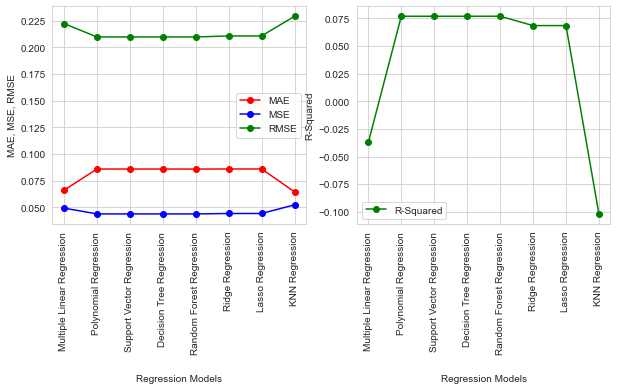

In [52]:
sns.set_style('whitegrid')

fig,(ax1,ax2)=plt.subplots(ncols=2,figsize=(10,4));
ax1.plot(MAE_list,color='red', label='MAE', marker="o")
ax1.plot(MSE_list, color='blue', label='MSE', marker="o")
ax1.plot(RMSE_list,color='green', label='RMSE', marker="o")
ax2.plot(R_Squared_list,  color='green', label='R-Squared', marker="o")
ax1.legend()
ax2.legend()
ax1.set_xticks(ticks=range(len(MAE_list)))
ax2.set_xticks(ticks=range(len(R_Squared_list)))
ax1.set_xticklabels(models_list, rotation=90)
ax2.set_xticklabels(models_list, rotation=90)
ax1.set_xlabel('Regression Models', labelpad=20)
ax2.set_xlabel('Regression Models', labelpad=20)
ax1.set_ylabel('MAE, MSE, RMSE')
ax2.set_ylabel('R-Squared')
plt.show()

# for index, value in enumerate(accuracy_score_list):
#     plt.text(index, value+0.020, "%.3f" %value, ha="center")

In [53]:
print(np.min(RMSE_list))
print(np.argmin(RMSE_list))
print(models_list[np.argmin(RMSE_list)])

0.20969521255962667
4
Random Forest Regression


In [54]:
print(np.max(R_Squared_list))
print(np.argmax(R_Squared_list))
print(models_list[np.argmax(R_Squared_list)])

0.07688012640114217
4
Random Forest Regression


# Cross validation 


In [55]:
from sklearn.model_selection import KFold

In [58]:
kf =KFold(n_splits =5)
for train_index,test_index in kf.split(iv):
    x_train,x_test,y_train,y_test= iv.iloc[train_index],iv.iloc[test_index],dv.iloc[train_index],dv.iloc[test_index]
    print( x_train,'\n',x_test,'\n',y_train,'\n',y_test)
    print(x_train.shape,x_test.shape,y_train.shape,y_test.shape)

       telecommuting  has_company_logo  has_questions
3576               0                 1              0
3577               0                 1              0
3578               0                 0              1
3579               0                 1              0
3580               0                 1              1
...              ...               ...            ...
17875              0                 1              1
17876              0                 1              1
17877              0                 0              0
17878              0                 0              1
17879              0                 1              1

[14304 rows x 3 columns] 
       telecommuting  has_company_logo  has_questions
0                 0                 1              0
1                 0                 1              0
2                 0                 1              0
3                 0                 1              0
4                 0                 1              1
...   